<a href="https://colab.research.google.com/github/deva285/data-analytics-dn/blob/main/miniproject5_ebola.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import pprint as pp
from tabulate import tabulate
import traceback
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import numpy as py
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/dataset/dataset_csv/dataset_ebola/ebola_data_db_format.csv')
display(pd.DataFrame(data))
df = pd.DataFrame(data)

,Indicator,Country,Date,value
0,"Cumulative number of confirmed, probable and s...",Guinea,2015-03-10,3285.0
1,Cumulative number of confirmed Ebola cases,Guinea,2015-03-10,2871.0
2,Cumulative number of probable Ebola cases,Guinea,2015-03-10,392.0
3,Cumulative number of suspected Ebola cases,Guinea,2015-03-10,22.0
4,"Cumulative number of confirmed, probable and s...",Guinea,2015-03-10,2170.0
...,...,...,...,...
17580,"Cumulative number of confirmed, probable and s...",Spain,2016-03-23,0.0
17581,Cumulative number of confirmed Ebola deaths,United States of America,2016-03-23,1.0
17582,Cumulative number of probable Ebola deaths,United States of America,2016-03-23,0.0
17583,Cumulative number of suspected Ebola deaths,United States of America,2016-03-23,0.0


***Part I***

  
1. Distinct # of Indicators in the universe (complete dataset).

In [ ]:
distinct_indicators = df['Indicator'].nunique()
print(f"Distinct # of Indicators")
print(distinct_indicators)

Distinct # of Indicators
36


2. In the second half of the year 2015, how many countries have one or more “Cumulative number of confirmed Ebola cases”

In [ ]:
df['Year'] = df['Date'].str[:4]
df['Month'] = df['Date'].str[5:7]
df['Year'] = df['Year'].astype(int)
df['Month'] = df['Month'].astype(int)
Second_half_2015 = df[(df['Year'] == 2015) & (df['Month'] >= 1 ) & (df['Indicator'] == 'Cumulative number of confirmed Ebola cases')]
Countries_with_cases = Second_half_2015['Country'].nunique()
table = [['Distinct Countries with Confirmed Cases in second Half of the year 2015', Countries_with_cases]]
print(tabulate(table, headers=['Metric', 'Value'], tablefmt='fancy_grid'))

╒═════════════════════════════════════════════════════════════════════════╤═════════╕
│ Metric                                                                  │   Value │
╞═════════════════════════════════════════════════════════════════════════╪═════════╡
│ Distinct Countries with Confirmed Cases in second Half of the year 2015 │      11 │
╘═════════════════════════════════════════════════════════════════════════╧═════════╛


3. Top 10 total Ebola cases confirmed. Note that Indicator = Cumulative number of confirmed Ebola cases. Include rank based on the total value (=cases confirmed).

In [ ]:
confirmed_cases = df[df['Indicator'] == 'Cumulative number of confirmed Ebola cases']
total_cases_by_country = confirmed_cases.groupby('Country')['value'].sum().reset_index()
total_cases_by_country['Rank'] = total_cases_by_country['value'].rank(ascending=False)
top_10_countries = total_cases_by_country.sort_values(by='value', ascending=False).head(10)
table = tabulate(top_10_countries[['Country', 'value', 'Rank']],headers=['Country', 'Total Confirmed Cases', 'Rank'],tablefmt='fancy_grid')
print(table)

╒════╤══════════════════════════╤═════════════════════════╤════════╕
│    │ Country                  │   Total Confirmed Cases │   Rank │
╞════╪══════════════════════════╪═════════════════════════╪════════╡
│  8 │ Sierra Leone             │             2.04187e+06 │      1 │
├────┼──────────────────────────┼─────────────────────────┼────────┤
│  3 │ Liberia                  │        768079           │      2 │
├────┼──────────────────────────┼─────────────────────────┼────────┤
│  0 │ Guinea                   │        749622           │      3 │
├────┼──────────────────────────┼─────────────────────────┼────────┤
│  6 │ Nigeria                  │          4840           │      4 │
├────┼──────────────────────────┼─────────────────────────┼────────┤
│  5 │ Mali                     │          1658           │      5 │
├────┼──────────────────────────┼─────────────────────────┼────────┤
│ 11 │ United States of America │           967           │      6 │
├────┼──────────────────────────┼─

4. Top 10 countries that have total cases with Indicator = “Cumulative number of confirmed probable and suspected Ebola deaths” in 2015 Q2 (i.e., April-June 2015).

In [ ]:
df['Year'] = df['Date'].str[:4]
df['Month'] = df['Date'].str[5:7]
df['Year'] = df['Year'].astype(int)
df['Month'] = df['Month'].astype(int)
Q2_2015 = df[(df['Year'] == 2015) & (df['Month'].isin([4, 5, 6])) & (df['Indicator'] == 'Cumulative number of confirmed, probable and suspected Ebola deaths')]
Total_Deaths_Q2 = Q2_2015.groupby('Country')['value'].sum().reset_index()
Total_Deaths_Q2['Rank'] = Total_Deaths_Q2['value'].rank(ascending=False)
top_10_Q2_2015 = Total_Deaths_Q2.sort_values(by='value', ascending=False).head(10)
table = tabulate(top_10_Q2_2015[['Country', 'value', 'Rank']],headers=['Country', 'Total Deaths', 'Rank'], tablefmt='fancy_grid')
print(table)

╒════╤══════════════════════════╤════════════════╤════════╕
│    │ Country                  │   Total Deaths │   Rank │
╞════╪══════════════════════════╪════════════════╪════════╡
│  2 │ Liberia                  │         273262 │    1   │
├────┼──────────────────────────┼────────────────┼────────┤
│  6 │ Sierra Leone             │         226331 │    2   │
├────┼──────────────────────────┼────────────────┼────────┤
│  0 │ Guinea                   │         139652 │    3   │
├────┼──────────────────────────┼────────────────┼────────┤
│  4 │ Nigeria                  │            464 │    4   │
├────┼──────────────────────────┼────────────────┼────────┤
│  3 │ Mali                     │            348 │    5   │
├────┼──────────────────────────┼────────────────┼────────┤
│  9 │ United States of America │             58 │    6   │
├────┼──────────────────────────┼────────────────┼────────┤
│  1 │ Italy                    │              0 │    8.5 │
├────┼──────────────────────────┼───────

5. Top 10 countries that have total cases with Indicator = “Cumulative number of confirmed probable and suspected Ebola deaths” with only even months of the year 2015 (i.e., months 2, 4, 6, 8, 10, 12).

In [ ]:
df['Year'] = df['Date'].str[:4]
df['Month'] = df['Date'].str[5:7]
df['Year'] = df['Year'].astype(int)
df['Month'] = df['Month'].astype(int)
even_months = [2, 4, 6, 8, 10, 12]
odd_months = [1, 3, 5, 7, 9, 11]
even_months_2015 = df[(df['Year'] == 2015) & (df['Month'].isin(even_months)) & (df['Indicator'] == 'Cumulative number of confirmed, probable and suspected Ebola deaths')]
total_deaths_even_months = even_months_2015.groupby('Country')['value'].sum().reset_index()
total_deaths_even_months['Rank'] = total_deaths_even_months['value'].rank(ascending=False)
top_10_even_months = total_deaths_even_months.sort_values(by='value', ascending=False).head(10)
odd_months_2015 = df[(df['Year'] == 2015) & (df['Month'].isin(odd_months)) & (df['Indicator'] == 'Cumulative number of confirmed, probable and suspected Ebola deaths')]
total_deaths_odd_months = odd_months_2015.groupby('Country')['value'].sum().reset_index()
total_deaths_odd_months['Rank'] = total_deaths_odd_months['value'].rank(ascending=False)
top_10_odd_months = total_deaths_odd_months.sort_values(by='value', ascending=False).head(10)
even_months_table = tabulate(top_10_even_months[['Country', 'value', 'Rank']],headers=['Country', 'Total Deaths (Even Months)', 'Rank'],tablefmt='fancy_grid')
odd_months_table = tabulate(top_10_odd_months[['Country', 'value', 'Rank']],headers=['Country', 'Total Deaths (Odd Months)', 'Rank'],tablefmt='fancy_grid')
print("Top 10 Countries by Total Deaths in Even Months of 2015:")
print(even_months_table)
print("Top 10 Countries by Total Deaths in Odd Months of 2015:")
print(odd_months_table)

Top 10 Countries by Total Deaths in Even Months of 2015:
╒════╤══════════════════════════╤══════════════════════════════╤════════╕
│    │ Country                  │   Total Deaths (Even Months) │   Rank │
╞════╪══════════════════════════╪══════════════════════════════╪════════╡
│  2 │ Liberia                  │                       483402 │    1   │
├────┼──────────────────────────┼──────────────────────────────┼────────┤
│  7 │ Sierra Leone             │                       402717 │    2   │
├────┼──────────────────────────┼──────────────────────────────┼────────┤
│  0 │ Guinea                   │                       252224 │    3   │
├────┼──────────────────────────┼──────────────────────────────┼────────┤
│  5 │ Nigeria                  │                          840 │    4   │
├────┼──────────────────────────┼──────────────────────────────┼────────┤
│  4 │ Mali                     │                          630 │    5   │
├────┼──────────────────────────┼──────────────────────

6. Find Country and Indicator wise total value. Also, rank on the total_value which is the sum at the Country-Indicator level.

In [ ]:
table = tabulate(top_10_countries[['Country', 'value', 'Rank']],headers=['Country', 'Total Confirmed Cases', 'Rank'],tablefmt='fancy_grid')
print(table)

table = tabulate(top_10_countries[['Country', 'value', 'Rank']],headers=['Country', 'Total Confirmed Cases', 'Rank'],tablefmt='simple') # Or try other tablefmt options
print(table)
from tabulate import tabulate
data = [["Alice", 24], ["Bob", 19]]
headers = ["Name", "Age"]
table = tabulate(data, headers, tablefmt="simple")
print(table)

╒════╤══════════════════════════╤═════════════════════════╤════════╕
│    │ Country                  │   Total Confirmed Cases │   Rank │
╞════╪══════════════════════════╪═════════════════════════╪════════╡
│  8 │ Sierra Leone             │             2.04187e+06 │      1 │
├────┼──────────────────────────┼─────────────────────────┼────────┤
│  3 │ Liberia                  │        768079           │      2 │
├────┼──────────────────────────┼─────────────────────────┼────────┤
│  0 │ Guinea                   │        749622           │      3 │
├────┼──────────────────────────┼─────────────────────────┼────────┤
│  6 │ Nigeria                  │          4840           │      4 │
├────┼──────────────────────────┼─────────────────────────┼────────┤
│  5 │ Mali                     │          1658           │      5 │
├────┼──────────────────────────┼─────────────────────────┼────────┤
│ 11 │ United States of America │           967           │      6 │
├────┼──────────────────────────┼─

7. For those Top 10 countries by Indicator = Cumulative number of confirmed Ebola cases, plot group bar chart.

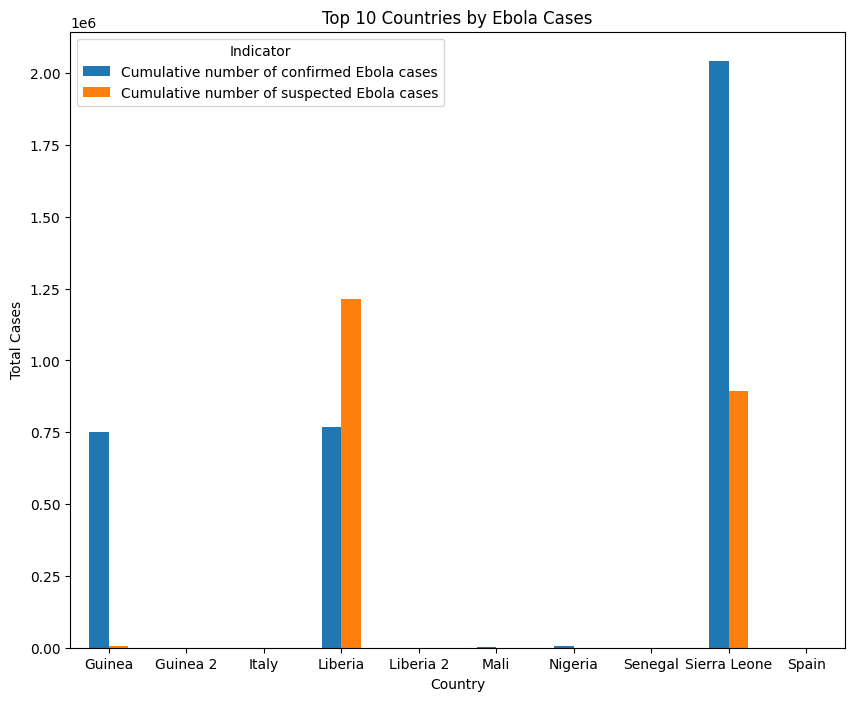

In [ ]:
top_10_countries_confirmed = total_cases_by_country.head(10)['Country']
top_10_data = df[df['Country'].isin(top_10_countries_confirmed) & df['Indicator'].isin(['Cumulative number of confirmed Ebola cases', 'Cumulative number of suspected Ebola cases'])]
grouped_data = top_10_data.groupby(['Country', 'Indicator'])['value'].sum().unstack()
grouped_data.plot(kind='bar', figsize=(10, 8))
plt.title('Top 10 Countries by Ebola Cases')
plt.ylabel('Total Cases')
plt.xticks(rotation=0)
plt.show()

***PART II***

       
1. Read "song.csv" into a dataframe and then produce the following output.
Write Output For Ranked Songs By its Highest Frequency. Whichever song won a particular rank (say 2) with maximum frequency takes that place. For example, Mysong1 won rank 1 for two different years (achieved maximum frequency for that particular rank) and so in output (see row 1 in Output expected below), it should appear as Mysong1 with rank 1 and count 2..
(Note. in the same year, now two songs have same rank.)

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/song.csv')
display(pd.DataFrame(df1))
df2 = pd.DataFrame(df1)
high_frequency = df2.groupby(['song_title', 'year'])['rank'].sum().reset_index()
high_frequency = high_frequency.sort_values(by='rank', ascending=False)
high_frequency['Rank'] = high_frequency.groupby('year')['rank'].rank(ascending=False, method='min')
ranked_songs = high_frequency[high_frequency['Rank'] == 1]
table = tabulate(ranked_songs[['song_title', 'year', 'rank', 'Rank']],headers=['song_title', 'year', 'Frequency', 'Rank'],tablefmt='fancy_grid')
print(table)
display(pd.DataFrame(df1))

,song_title,rank,year
0,Mysong1,1,2012
1,Mysong1,1,2013
2,Mysong1,2,2014
3,Mysong1,3,2015
4,Mysong2,2,2012
5,Mysong2,2,2013
6,Mysong2,1,2014
7,Mysong2,2,2015
8,Mysong3,3,2012
9,Mysong3,3,2013


╒════╤══════════════╤════════╤═════════════╤════════╕
│    │ song_title   │   year │   Frequency │   Rank │
╞════╪══════════════╪════════╪═════════════╪════════╡
│  3 │ Mysong1      │   2015 │           3 │      1 │
├────┼──────────────┼────────┼─────────────┼────────┤
│  8 │ Mysong3      │   2012 │           3 │      1 │
├────┼──────────────┼────────┼─────────────┼────────┤
│  9 │ Mysong3      │   2013 │           3 │      1 │
├────┼──────────────┼────────┼─────────────┼────────┤
│  2 │ Mysong1      │   2014 │           2 │      1 │
╘════╧══════════════╧════════╧═════════════╧════════╛


,song_title,rank,year
0,Mysong1,1,2012
1,Mysong1,1,2013
2,Mysong1,2,2014
3,Mysong1,3,2015
4,Mysong2,2,2012
5,Mysong2,2,2013
6,Mysong2,1,2014
7,Mysong2,2,2015
8,Mysong3,3,2012
9,Mysong3,3,2013


2. House Price Prediction task.
    1. Pre-processing: Convert non-numeric columns (mainroad, guestroom, basement, hotwaterheating, airconditioning) to numeric using one-hot encoding if the column values are not interrelated. If column values are related, need to use ordinal encoding.
    2. Pre-processing: Use pd.get_dummies to convert the one-hot encoding from the previous step into single columns. [link | link]
    3. Use two-fold cross-validation [sklearn]  and predict (use linear regression) the house price (column "price") using features (all columns except "price" are the features). You need output evaluation metrics: R1-squared error, Mean Squared Error (MSE), Root Mean Squared Error (RMSE). Mean Average Error (MAE). See doc for some short introduction for these evaluation metrics. In case the evaluation metrics (RMSE, MAE, MSE etc) have higher value (i.e., high error), then use standard scaler on the target column (column "price") to scale them. Additionally, you can also use standard scaler to scale the numeric features (i.e., those features other than target "price" and columns not converted to numeric using some encoding methods such as ordinal encoding and one-hot encoding). Some sample basic code notebook for Linear Regression (also use the internet for more) that starts with import of LinearRegression from sklearn.linear_model.

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
non_numeric_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning']
numeric_columns = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
df2 = pd.read_csv('/content/drive/MyDrive/Housing.csv')
df3 = pd.DataFrame(df2)
for col in non_numeric_columns:
    df3[col] = df3[col].map({'yes': 1, 'no': 0})
df3['quantile'] = pd.qcut(df3['price'], q=3, labels=['low', 'medium', 'high'])
print(df3[['price', 'quantile']])

        price quantile
0    13300000     high
1    12250000     high
2    12250000     high
3    12215000     high
4    11410000     high
..        ...      ...
540   1820000      low
541   1767150      low
542   1750000      low
543   1750000      low
544   1750000      low

[545 rows x 2 columns]


3. Create three equal-size buckets of House Price data. Bin the data into 3 quantiles (new column: quantile) of  'low', 'medium', 'high' based on "price" column in the House Price dataset.

In [4]:
import kagglehub
path = kagglehub.dataset_download("ashydv/housing-dataset")
print("Path to dataset files:", path)
new_column_quantile = pd.qcut(df3['price'], q=3, labels=['low', 'medium', 'high'])
print(new_column_quantile)

Path to dataset files: /root/.cache/kagglehub/datasets/ashydv/housing-dataset/versions/1
0      high
1      high
2      high
3      high
4      high
       ... 
540     low
541     low
542     low
543     low
544     low
Name: price, Length: 545, dtype: category
Categories (3, object): ['low' < 'medium' < 'high']
